In [2]:
!pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.14.0


In [ ]:
!pip list

In [3]:
## Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Divide the dataset into dependent and independent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
## Concatenate geography and gender
X = X.drop(['Geography', 'Gender'], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X = pd.concat([X, geography, gender], axis = 1)

In [14]:
## Splitting the dataset into training and testing test
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
## Part Two: Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [21]:
## Initialize ANN
classifier = Sequential()

In [45]:
## Add input layer
classifier.add(Dense(units=11, activation='relu'))
classifier.add(Dropout(0.2))

In [46]:
## Add first Hidden Layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [47]:
## Add second Hidden Layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.4))

In [48]:
## Add output layer
classifier.add(Dense(1, activation='sigmoid'))

In [49]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    #start_from_epoch=0,
)

In [51]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 7s 6ms/step - loss: 0.5544 - accuracy: 0.7962 - val_loss: 0.5079 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.5183 - accuracy: 0.7962 - val_loss: 0.4963 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4932 - accuracy: 0.7962 - val_loss: 0.4718 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4828 - accuracy: 0.7962 - val_loss: 0.4671 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4762 - accuracy: 0.7962 - val_loss: 0.4583 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4743 - accuracy: 0.7962 - val_loss: 0.4533 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4788 - accuracy: 0.7962 - val_loss: 0.4579 - val_accuracy:

In [52]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

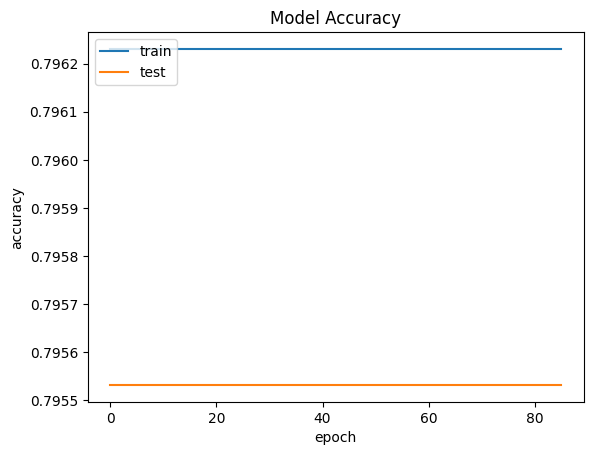

In [53]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

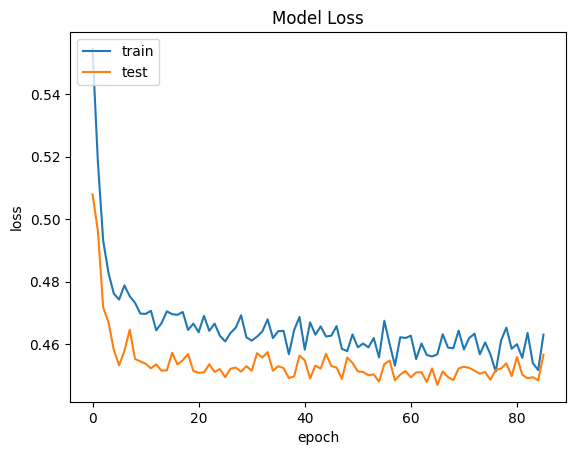

In [54]:
# Summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
## Part 3: Making the Predictions and evaluating the model

## Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [56]:
## Make the confusion metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [58]:
## Calculate the Accuracy
score = accuracy_score(y_test, y_pred)
score

0.7975

In [44]:
## Get the weights
classifier.get_weights()

[array([[-3.36941153e-01,  5.58580412e-03, -1.49711341e-01,
         -2.97095403e-02,  7.33842924e-02, -9.53405574e-02,
         -5.60476184e-02,  1.25523478e-01, -2.47639686e-01,
          2.20071338e-02,  1.50936902e-01],
        [-2.61555135e-01,  8.25608969e-01,  1.18422067e+00,
          2.99548894e-01, -1.06528960e-01,  1.81610379e-02,
          2.89350659e-01, -1.30347621e+00,  6.78383410e-01,
          6.02936089e-01, -8.39238822e-01],
        [ 5.22900939e-01,  3.82337756e-02, -2.79142022e-01,
         -2.19229102e-01,  7.99135789e-02, -8.61208439e-02,
         -2.52516091e-01,  5.72635233e-01,  4.97776538e-01,
         -3.08460444e-01, -4.78566438e-01],
        [ 3.88681054e-01, -3.06507908e-02,  5.09483039e-01,
          3.22273783e-02,  3.40251803e-01,  1.27843595e+00,
          6.19576752e-01,  3.19298625e-01, -3.84054095e-01,
         -6.90725267e-01,  1.49112210e-01],
        [ 7.85048760e-04,  1.44970298e+00,  4.82892692e-02,
         -2.11868688e-01, -7.82849848e-01, -